[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MaxMitre/Aplicaciones-Financieras/blob/main/Semana6/2_ValuacionOpciones_MonteCarlo.ipynb)

# Simulación Monte Carlo para valuación de Opciones

En esta clase veremos como utilizar el método de muestre MonteCarlo para dar un precio a nuestras opciones de tipo Call Europeo.

In [ ]:
# !pip install yfinance

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

import yfinance as yf
import pandas as pd

# Paréntesis Culturas: POO (si es necesario)

In [ ]:
class ObjetoBasico:
  def __init__(self, una_caracteristica):
    self.caracteristica = una_caracteristica
    self.edad = 3*una_caracteristica

  def duplicar(self):
    return self.caracteristica*2

In [ ]:
a = ObjetoBasico(6)

In [ ]:
a

In [ ]:
# Atributo
a.caracteristica

6

In [ ]:
a.edad

18

In [ ]:
# Método
a.duplicar()

12

In [ ]:
df = pd.DataFrame({'a':[0,1], 'b': [3,4]})

In [ ]:
df

,a,b
0,0,3
1,1,4


In [ ]:
df.columns

Index(['a', 'b'], dtype='object')

<Axes: >

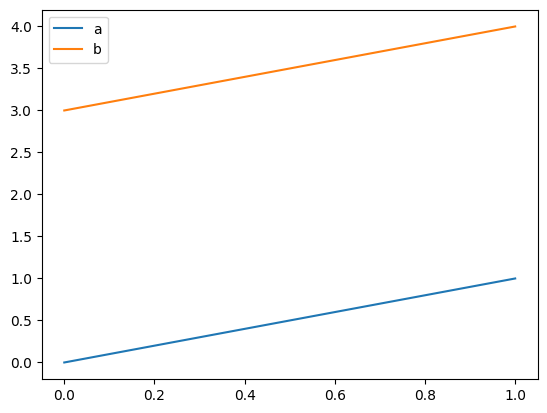

In [ ]:
df.plot()

# Simulación por caminos (datos sintéticos)

La ecuación diferencial estocástica que define el camino seguido por un activo es:

$$ dS_t = \mu \, dt + \gamma \, dW_t, $$

donde $S_t$ representa el precio del activo al tiempo t, $\mu$ es el retorno anual esperado, $\gamma$ representa la *volatilidad implicita* del mercado.

In [ ]:
class European_Call_Payoff:

    def __init__(self, strike):
        self.strike = strike

    def get_payoff(self, stock_price):
        if stock_price > self.strike:
            return stock_price - self.strike
        else:
            return 0

In [ ]:
class GeometricBrownianMotion:

    def simulate_paths(self):
        while(self.T - self.dt > 0):
            dWt = np.random.normal(0, math.sqrt(self.dt))  # Movimiento Browniano
            dYt = self.drift*self.dt + self.volatility*dWt  # Cambio/Delta del precio
            self.current_price += dYt  # Agregar el cambio al precio actual
            self.prices.append(self.current_price)  # Agregar nuevo precio a la serie de tiempo
            self.T -= self.dt  # Tomar en cuenta el cambio del tiempo

    def __init__(self, initial_price, drift, volatility, dt, T):
        self.current_price = initial_price
        self.initial_price = initial_price
        self.drift = drift
        self.volatility = volatility
        self.dt = dt
        self.T = T
        self.prices = []
        self.simulate_paths()

## Parámetros artificiales

In [ ]:
paths = 200
initial_price = 100
drift = .5
volatility = .05
dt = 1/360
T = 30/360
price_paths = []

La ecuación diferencial estocástica que define el camino seguido por un activo es:

$$ dS_t = \mu \, dt + \gamma \, dW_t, $$

donde $S_t$ representa el precio del activo al tiempo t, $\mu$ es el retorno anual esperado, $\gamma$ representa la *volatilidad implicita* del mercado.

In [ ]:
# Generar un conjunto de caminos
for i in range(0, paths):
    price_paths.append(GeometricBrownianMotion(initial_price, drift, volatility, dt, T).prices)

In [ ]:
call_payoffs = []
ec = European_Call_Payoff(100) # Le pasamos el precio acordado en el contrato (STRIKE)
risk_free_rate = .01
for price_path in price_paths:
    call_payoffs.append(ec.get_payoff(price_path[-1])/(1 + risk_free_rate))
    # Vemos el último precio simulado y comparamos con el precio del contrato para saber si ganamos algo o es un cero.

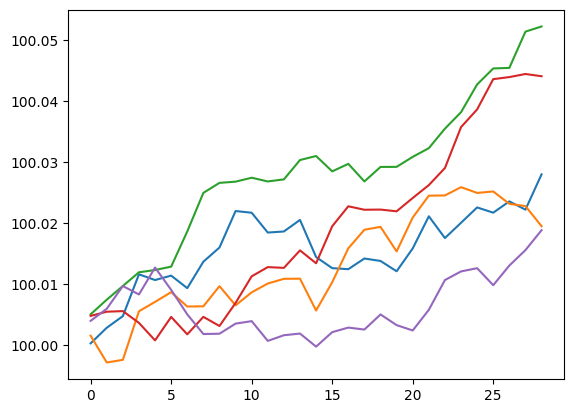

In [ ]:
# Visualicación de los caminos
for price_path in price_paths[:5]:
    plt.plot(price_path)
plt.show()

In [ ]:
print(np.average(call_payoffs))  # Comentar sobre como se venden las opciones en el mercado, por bloques

0.03761607291871916


## Ésta solución tiene un pequeño inconveniente, que necesita la "volatilidad implicita."

# Simulación Monte Carlo

In [ ]:
data = yf.download(
        # Lista de tickers o puede ser un string
        tickers = "GOOGL ^IRX",

        # Parámetro "period", tambien se puede utilizar start/end
        # periodos válidos: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (opcional, default es '1mo')
        period = "1y",

        # Peidr datos por intervalo (incluye intradía si es menor a 60 days)
        # intervalos válidos: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (opcional, default es '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (opcional, default es 'column')
        # group_by = 'ticker',
    ).loc[:, 'Adj Close']
data

[*********************100%%**********************]  2 of 2 completed


Ticker,GOOGL,^IRX
Date,,
2023-05-16,NaN,5.058
2023-05-17,120.839996,5.088
2023-05-18,122.830002,5.125
2023-05-19,122.760002,5.085
2023-05-22,125.050003,5.095
...,...,...
2024-05-10,168.649994,5.243
2024-05-13,169.139999,5.240
2024-05-14,170.339996,5.235


Crea un simulador de Movimiento Browniano Geométrico.

$$
S_T = S_0 \exp \left[ \left( r - \dfrac{\sigma^2}{2} \right) T + \sigma\epsilon\sqrt{T}  \right],
$$
donde $\epsilon$ es una simulación de una Normal estándar.

Ésta ecuación es la que nos dará la simulación del precio del del activo en el futuro al llevar a cabo simulaciones de variables aleatorias normales. Esto nos ayudará e encontrar el precio de la opción.

Como extra, solucionar esta ecuación es bastante complejo, pero se puede hacer con una herramienta llamada ecuación de Black-Scholes.

In [ ]:
data

Ticker,GOOGL,^IRX
Date,,
2023-05-16,NaN,5.058
2023-05-17,120.839996,5.088
2023-05-18,122.830002,5.125
2023-05-19,122.760002,5.085
2023-05-22,125.050003,5.095
...,...,...
2024-05-10,168.649994,5.243
2024-05-13,169.139999,5.240
2024-05-14,170.339996,5.235


In [ ]:
# ¿Recuerda esto de la clase del martes?

# Renombrando columna
data.rename(columns={'^IRX':'IRX'}, inplace=True)

# Tasa de interes vista como porcentaje
data['IRX'] = data['IRX']/100

# Retornos logaritmicos
data['Vol. GOOGL'] = np.nan
data['log_ret'] = np.log(data['GOOGL']) - np.log(data['GOOGL'].shift(1))

# Calculando volatilidad y anualizarla
fechas_vol = data.index
for cada_fecha in fechas_vol[125:]:
    data_for_vol = fechas_vol[(cada_fecha - fechas_vol < pd.Timedelta(days=180)) & (cada_fecha - fechas_vol >= pd.Timedelta(days=0))] # 120 dias para 6 meses
    data.loc[cada_fecha, 'Vol. GOOGL'] = np.std(data['log_ret'][data_for_vol].values, ddof=1)*np.sqrt(252)


In [ ]:
data

Ticker,GOOGL,IRX,Vol. GOOGL,log_ret
Date,,,,
2023-05-16,NaN,0.05058,NaN,NaN
2023-05-17,120.839996,0.05088,NaN,NaN
2023-05-18,122.830002,0.05125,NaN,0.016334
2023-05-19,122.760002,0.05085,NaN,-0.000570
2023-05-22,125.050003,0.05095,NaN,0.018482
...,...,...,...,...
2024-05-10,168.649994,0.05243,0.291427,-0.007738
2024-05-13,169.139999,0.05240,0.293278,0.002901
2024-05-14,170.339996,0.05235,0.292556,0.007070


In [ ]:
un_dato = data.iloc[-3,:].copy()
un_dato

Ticker
GOOGL         170.339996
IRX             0.052350
Vol. GOOGL      0.292556
log_ret         0.007070
Name: 2024-05-14 00:00:00, dtype: float64

Recordemos la fórmula:
$$
S_T = S_0 \exp \left[ \left( r - \dfrac{\sigma^2}{2} \right) T + \sigma\epsilon\sqrt{T}  \right],
$$


In [ ]:
valores = np.array([])

K = un_dato.GOOGL + 10 # Nosotros escogemos el precio de STRIKE

for i in range(10000):
  normal = np.random.standard_normal(1)

  St = un_dato.GOOGL*np.exp((un_dato.IRX - 0.5*un_dato['Vol. GOOGL']**2)*30/360 + un_dato['Vol. GOOGL']*normal*np.sqrt(30/360))

  valores = np.append(valores, max(St - K,0))

In [ ]:
np.set_printoptions(suppress=True)

In [ ]:
valores[:10]

array([0.        , 4.5281068 , 0.        , 0.        , 9.49302971,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [ ]:
valores.mean()

2.4099223718798517

(array([8001.,  485.,  400.,  299.,  238.,  168.,  130.,   98.,   59.,
          48.,   32.,   19.,    9.,    5.,    4.,    3.,    1.,    0.,
           0.,    1.]),
 array([ 0.        ,  2.86538393,  5.73076787,  8.5961518 , 11.46153573,
        14.32691966, 17.1923036 , 20.05768753, 22.92307146, 25.78845539,
        28.65383933, 31.51922326, 34.38460719, 37.24999113, 40.11537506,
        42.98075899, 45.84614292, 48.71152686, 51.57691079, 54.44229472,
        57.30767865]),
 <BarContainer object of 20 artists>)

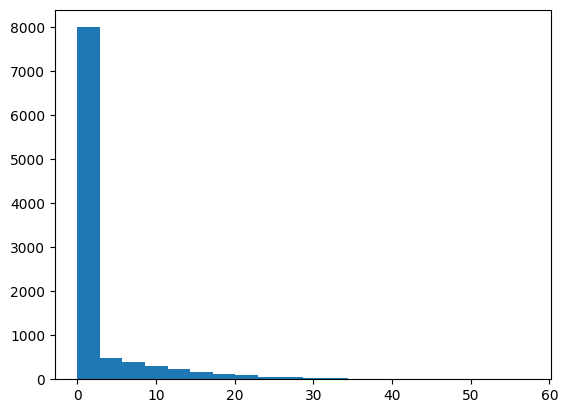

In [ ]:
plt.hist(valores, bins=20)

# Ejercicio 1

Adaptar el código para que a cada entrada del DataFrame le calculen el valor de la opción, como en la clase pasada

In [ ]:
# Herramienta auxiliar para sus futuros ciclos
from tqdm import tqdm

In [ ]:
for i in tqdm(range(10000000)):
  pass

100%|██████████| 10000000/10000000 [00:02<00:00, 4062152.04it/s]


In [ ]:
# Espacio para el ejercicio 1
data_cop = data[data['Vol. GOOGL'].notnull()].copy()
data_cop['precio_call'] = np.nan

for index in tqdm(data_cop.index):
  valores = np.array([])
  un_dato = data_cop.loc[index, :]

  for i in range(10000):

    K = un_dato.GOOGL + 0
    normal = np.random.standard_normal(1)

    St = un_dato.GOOGL*np.exp((un_dato.IRX - 0.5*un_dato['Vol. GOOGL']**2)*30/360 + un_dato['Vol. GOOGL']*normal*np.sqrt(30/360))

    valores = np.append(valores, max(St - K,0))

  data_cop.loc[index ,'precio_call'] = valores.mean()


100%|██████████| 128/128 [01:23<00:00,  1.53it/s]


In [ ]:
data_cop

Ticker,GOOGL,IRX,Vol. GOOGL,log_ret,precio_call
Date,,,,,
2023-11-13,132.089996,0.05260,0.278241,-0.003778,4.474592
2023-11-14,133.619995,0.05253,0.277772,0.011516,4.618869
2023-11-15,134.619995,0.05255,0.277933,0.007456,4.727613
2023-11-16,136.929993,0.05243,0.277773,0.017014,4.743760
2023-11-17,135.309998,0.05233,0.277249,-0.011901,4.594282
...,...,...,...,...,...
2024-05-10,168.649994,0.05243,0.291427,-0.007738,6.110772
2024-05-13,169.139999,0.05240,0.293278,0.002901,6.073853
2024-05-14,170.339996,0.05235,0.292556,0.007070,6.186347


# Ejercicio 2:

Lo anterior, apliquelo utilizando una función y un apply para el DataFrame (probablemente el ejercicio anterior lo hicieron modificando entrada por entrada)

In [ ]:
# Espacio para el ejercicio 2


# Ejercicio 3:

Utilizando los visto en la clase pasada, cree una columna que tenga los precios de los calls dados por Black-Scholes (el método de la clase anterior).

Haga las importaciones necesarias para lograrlo.

In [ ]:
# Importación de módulo
from scipy.stats import norm

In [ ]:
# Espacio para el ejercicio 3

def ByS_call(spot, strike, risk_free, vol, tiempo):
    d_1 = (np.log(spot/strike) + (risk_free + 0.5*vol*vol)*(tiempo/360)) / (vol * np.sqrt(tiempo/360))
    d_2 = d_1 - vol*np.sqrt(tiempo/360)
    value = spot * norm.cdf(d_1) - strike * np.exp(-risk_free * (tiempo/360)) * norm.cdf(d_2)
    return value

data_cop['calls_Black_Scholes'] = data_cop.apply(lambda x: ByS_call(x['GOOGL'], x['GOOGL'] + 0, x['IRX'], x['Vol. GOOGL'], 30), axis=1)



In [ ]:
data_cop

Ticker,GOOGL,IRX,Vol. GOOGL,log_ret,precio_call,calls_Black_Scholes
Date,,,,,,
2023-11-13,132.089996,0.05260,0.278241,-0.003778,4.474592,4.517391
2023-11-14,133.619995,0.05253,0.277772,0.011516,4.618869,4.562130
2023-11-15,134.619995,0.05255,0.277933,0.007456,4.727613,4.598880
2023-11-16,136.929993,0.05243,0.277773,0.017014,4.743760,4.674582
2023-11-17,135.309998,0.05233,0.277249,-0.011901,4.594282,4.610581
...,...,...,...,...,...,...
2024-05-10,168.649994,0.05243,0.291427,-0.007738,6.110772,6.021482
2024-05-13,169.139999,0.05240,0.293278,0.002901,6.073853,6.074654
2024-05-14,170.339996,0.05235,0.292556,0.007070,6.186347,6.103295


In [ ]:
data_cop['diferencia'] = np.abs(data_cop['precio_call'] - data_cop['calls_Black_Scholes'])

In [ ]:
data_cop

Ticker,GOOGL,IRX,Vol. GOOGL,log_ret,precio_call,calls_Black_Scholes,diferencia
Date,,,,,,,
2023-11-13,132.089996,0.05260,0.278241,-0.003778,4.474592,4.517391,0.042800
2023-11-14,133.619995,0.05253,0.277772,0.011516,4.618869,4.562130,0.056740
2023-11-15,134.619995,0.05255,0.277933,0.007456,4.727613,4.598880,0.128732
2023-11-16,136.929993,0.05243,0.277773,0.017014,4.743760,4.674582,0.069177
2023-11-17,135.309998,0.05233,0.277249,-0.011901,4.594282,4.610581,0.016299
...,...,...,...,...,...,...,...
2024-05-10,168.649994,0.05243,0.291427,-0.007738,6.110772,6.021482,0.089290
2024-05-13,169.139999,0.05240,0.293278,0.002901,6.073853,6.074654,0.000801
2024-05-14,170.339996,0.05235,0.292556,0.007070,6.186347,6.103295,0.083052


<Axes: >

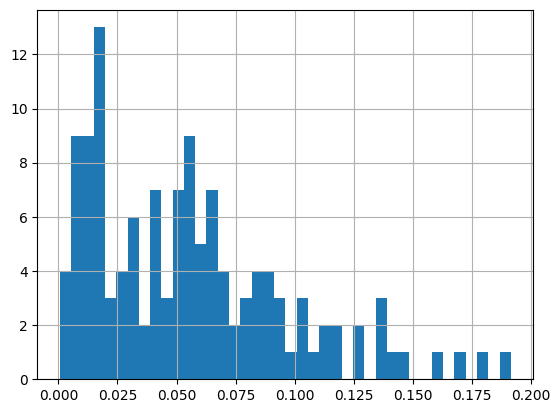

In [ ]:
data_cop.diferencia.hist(bins=40)

<Axes: xlabel='Date'>

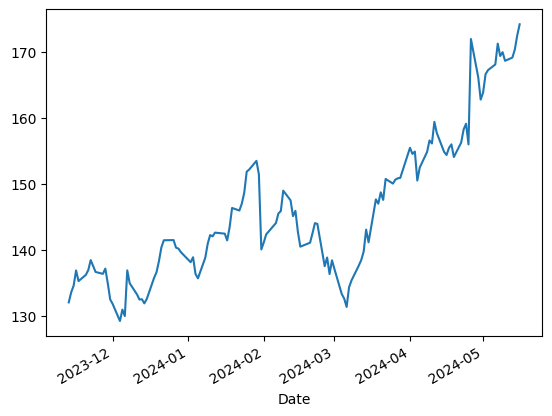

In [ ]:
data_cop.GOOGL.plot()

<Axes: xlabel='Date'>

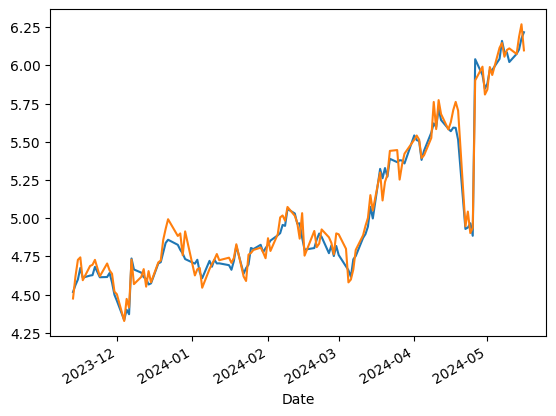

In [ ]:
data_cop.calls_Black_Scholes.plot()
data_cop.precio_call.plot()